### 2022-MLS: Лабораторные задания по предмету "Машинное обучение для задач информационной безопасности"
#### Лабораторная №1.
Магистр группы 6231 - Чаплыгин Алексей

In [1]:
#IMPORT
import joblib

import numpy as np
import pandas as pd
import seaborn as sns

from pickle import loads

import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
from joblib import dump

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.decomposition import PCA

In [3]:
def classify(model_path: str, data_path: str) -> np.ndarray:
    with open(model_path, 'rb') as f:
        components = loads(f.read())
        
    norm = components['norm']
    model = components['model']
    
    data = pd.read_csv(data_path)
    
    data = norm.transform(data)
    return model.predict(data)

In [4]:
def evaluate(model, x_test, y_test):
    preds = model.predict(x_test)
    f1 = f1_score(y_test, preds)
    print(f'f1-score: {f1:.2f}')
    conf_mat = confusion_matrix(y_test, preds)
    conf_mat = conf_mat / conf_mat.sum(axis=1, keepdims=True)
    sns.heatmap(conf_mat, annot=True)
    return conf_mat

In [5]:
ft = pd.read_csv('features_train.csv')
ft.shape

(2400, 20)

In [6]:
ft.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,72.265781,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,4.279063,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106


In [7]:
ct = pd.read_csv('classes_train.csv')
ct.shape

(2400, 1)

In [8]:
ct.head()

,is_bot
0,0
1,0
2,0
3,0
4,0


In [9]:
data = ft.copy()
data["is_bot"] = ct.is_bot
data.shape

(2400, 21)

In [10]:
data.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,...,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length,is_bot
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,...,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73,0
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,...,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142,0
2,704,3108,454,2400,77,0,0,0,1358,0.518409,...,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90,0
3,6091,304528,526,599,1515,0,1,1,4214,1.445420,...,0.124822,0.142145,0.359516,578.950570,10,0,11,0,51,0
4,12967,13693,204,1177,452,0,1,1,3200,4.052187,...,0.063750,0.367812,0.141250,67.122549,13,0,14,0,106,0


In [11]:
data.count()

statuses_count                     2400
followers_count                    2400
friends_count                      2400
favourites_count                   2400
listed_count                       2400
is_default_profile                 2400
is_profile_use_background_image    2400
is_verified                        2400
user_age                           2400
tweets_freq                        2400
followers_growth_rate              2400
friends_growth_rate                2400
favourites_growth_rate             2400
listed_growth_rate                 2400
followers_friends_ratio            2400
screen_name_length                 2400
num_digits_in_screen_name          2400
length_of_name                     2400
num_digits_in_name                 2400
description_length                 2400
is_bot                             2400
dtype: int64

In [12]:
data.nunique()

statuses_count                     2341
followers_count                    2079
friends_count                      1493
favourites_count                   1767
listed_count                        922
is_default_profile                    2
is_profile_use_background_image       2
is_verified                           2
user_age                           1617
tweets_freq                        2399
followers_growth_rate              2400
friends_growth_rate                2208
favourites_growth_rate             2096
listed_growth_rate                 2354
followers_friends_ratio            2145
screen_name_length                   13
num_digits_in_screen_name             6
length_of_name                       42
num_digits_in_name                    6
description_length                  164
is_bot                                2
dtype: int64

In [13]:
data.isnull().sum()

statuses_count                     0
followers_count                    0
friends_count                      0
favourites_count                   0
listed_count                       0
is_default_profile                 0
is_profile_use_background_image    0
is_verified                        0
user_age                           0
tweets_freq                        0
followers_growth_rate              0
friends_growth_rate                0
favourites_growth_rate             0
listed_growth_rate                 0
followers_friends_ratio            0
screen_name_length                 0
num_digits_in_screen_name          0
length_of_name                     0
num_digits_in_name                 0
description_length                 0
is_bot                             0
dtype: int64

<AxesSubplot: >

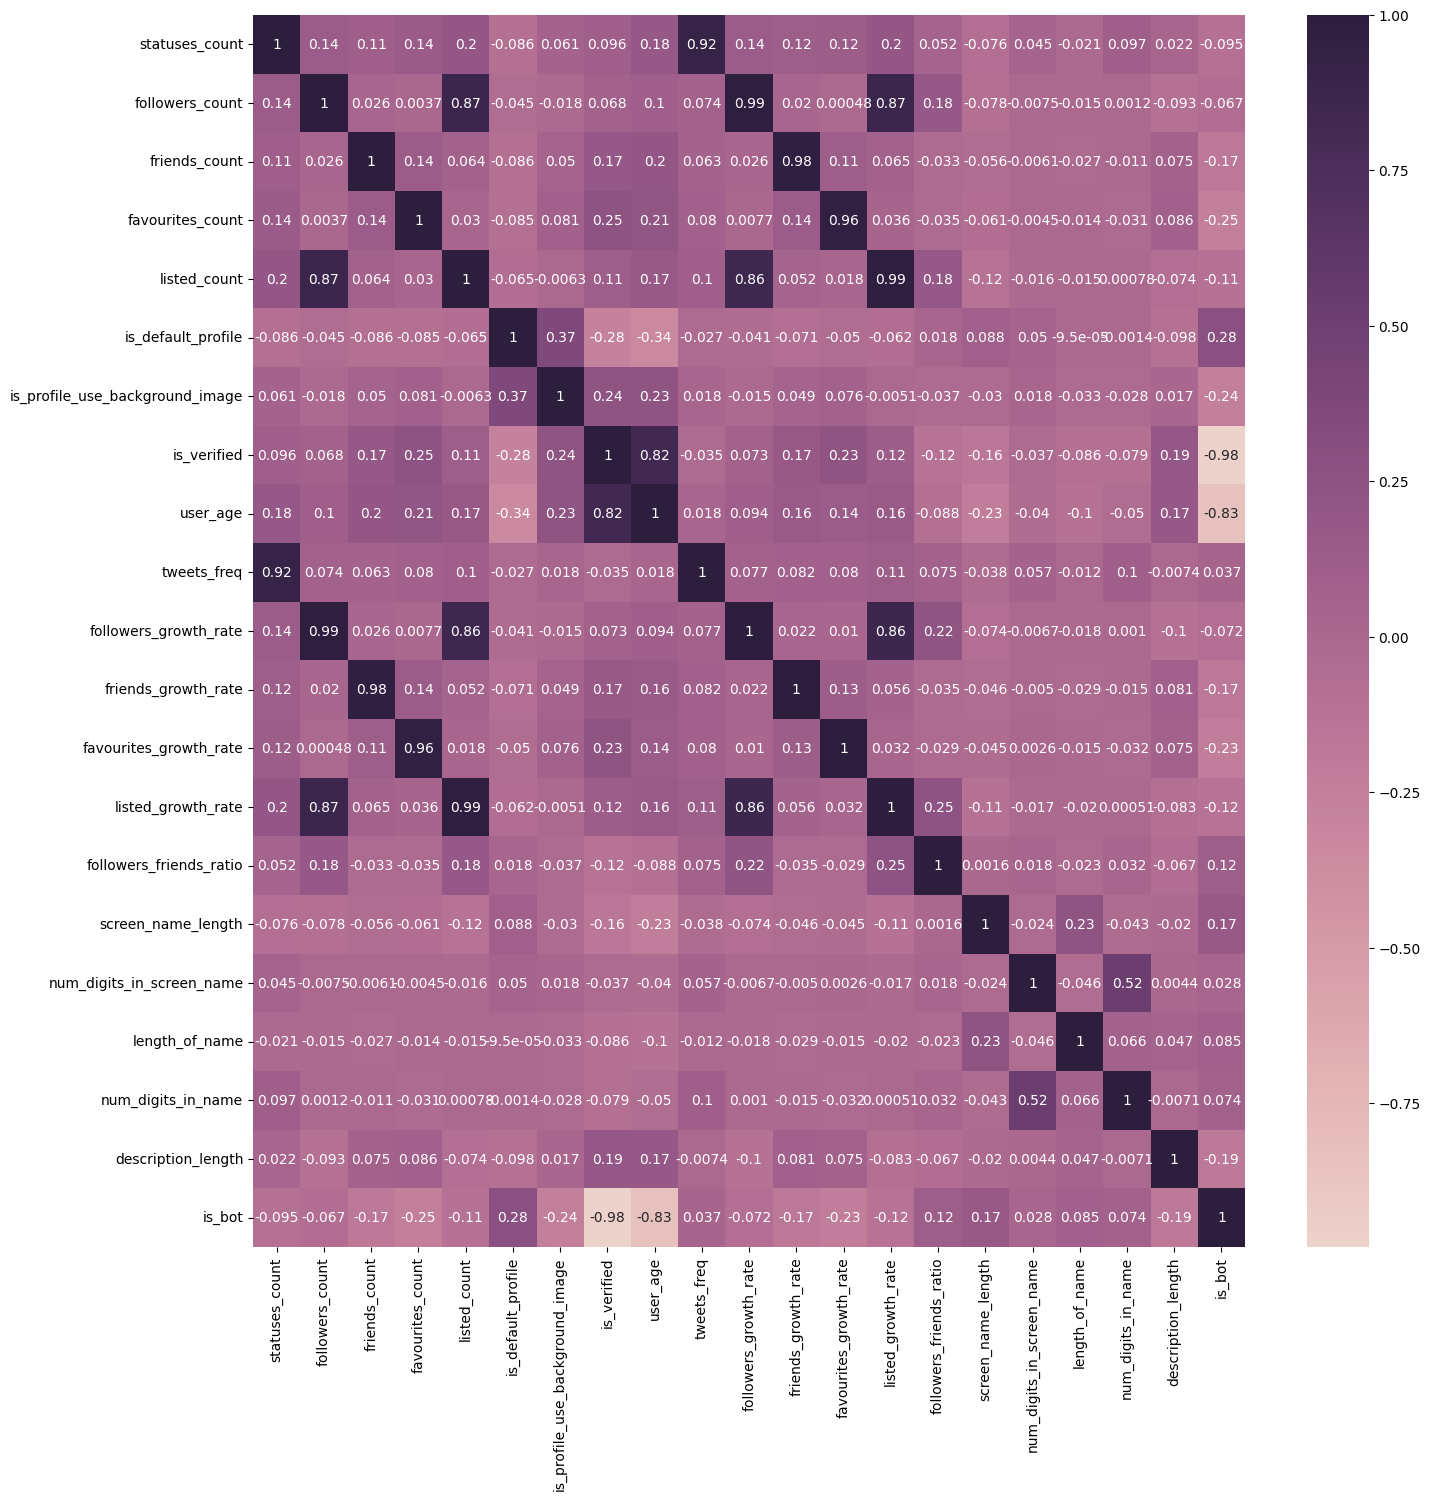

In [14]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data.corr(), cmap = sns.cubehelix_palette(as_cmap=True), annot=True)

In [15]:
X = data.drop(columns=["is_bot"], axis=1)
Y = data.is_bot

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [17]:
X_train.shape, X_test.shape

((1800, 20), (600, 20))

## 1. Базовый контест.

### 1.1. Обучить модель без каких-либо дополнительных условий, которая должна наилучшим образом отработать на тестовой выборке преподавателя с точки зрения F-меры.

In [18]:
# Результаты вычислений
F_data = [
          ['LogisticRegression',     0, LogisticRegression()     ],
          ['KNeighborsClassifier',   0, KNeighborsClassifier()   ],
          ['DecisionTreeClassifier', 0, DecisionTreeClassifier() ],
          ['RandomForestClassifier', 0, RandomForestClassifier() ]
        ]

In [19]:
print(F_data)

[['LogisticRegression', 0, LogisticRegression()], ['KNeighborsClassifier', 0, KNeighborsClassifier()], ['DecisionTreeClassifier', 0, DecisionTreeClassifier()], ['RandomForestClassifier', 0, RandomForestClassifier()]]


In [20]:
print(F_data[1][0])

KNeighborsClassifier


In [21]:
SS = StandardScaler()

In [22]:
for r in F_data:
    if r[0] == 'LogisticRegression':
        ## Логистическая регрессия
        X_train_LR = SS.fit_transform(X_train)
        X_test_LR = SS.transform(X_test)
        r[2].fit(X_train_LR, Y_train)
        Y_LR = r[2].predict(X_test_LR)
        r[1] = f1_score(Y_test, Y_LR, average = "weighted")
        
    elif r[0] == 'KNeighborsClassifier':
        ## K-соседей
        X_train_KNC = SS.fit_transform(X_train)
        X_test_KNC = SS.transform(X_test)
        r[2].fit(X_train_KNC, Y_train)
        Y_KNN = r[2].predict(X_test_KNC)
        r[1] = f1_score(Y_test, Y_KNN, average = "weighted")
        
    elif r[0] == 'DecisionTreeClassifier':
        ## DecisionTreeClassifier
        X_train_DTC = SS.fit_transform(X_train)
        X_test_DTC = SS.transform(X_test)
        r[2].fit(X_train_DTC, Y_train)
        Y_DTC = r[2].predict(X_test_DTC)
        r[1] = f1_score(Y_test, Y_DTC, average = "weighted")
        
    elif r[0] == 'RandomForestClassifier':
        ## RandomForestClassifier
        X_train_RFC = SS.fit_transform(X_train)
        X_test_RFC = SS.transform(X_test)
        r[2].fit(X_train_RFC, Y_train)
        Y_RFC = r[2].predict(X_test_RFC)
        r[1] = f1_score(Y_test, Y_RFC, average = "weighted")

In [23]:
mf = 0
for r in F_data:
    print(f'Model: {r[0]}, f1-score: {r[1]}')
    if r[1] > mf:
        m = r[2]
        mf = r[1]
        mn = r[0]

Model: LogisticRegression, f1-score: 0.9983353465631291
Model: KNeighborsClassifier, f1-score: 0.9933169548355198
Model: DecisionTreeClassifier, f1-score: 0.9966746747053093
Model: RandomForestClassifier, f1-score: 0.9983312974530304


In [24]:
print ('Наибольшее значение F-меры:', mf, '.  Модель:', mn)
#joblib.dump(m,  '1.1_Model ' + mn + '.pkl')
#dump(m, filename = '1.1_Model.joblib')
from pickle import dumps
with open('model_1.pkl', 'wb') as f:
    f.write(
        dumps(
            {
                'model': m,
                'norm' : SS
            }
        )
    )

Наибольшее значение F-меры: 0.9983353465631291 .  Модель: LogisticRegression


In [25]:
result = classify('model_1.pkl','features_train.csv')
print(result)

[0 0 1 ... 1 1 1]


## 2. Вторичные контесты.

### 2.1. Максимально логичным образом обучить качественную модель, использующую для работы только 10 признаков из всего исходного множества.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [27]:
pca = PCA(n_components=10).fit(X_train)
X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [28]:
for r in F_data:
    if r[0] == 'LogisticRegression':
        ## Логистическая регрессия
        r[2].fit(X_train_PCA, Y_train)
        Y_LR = r[2].predict(X_test_PCA)
        r[1] = f1_score(Y_test, Y_LR, average = "weighted")
        
    elif r[0] == 'KNeighborsClassifier':
        ## K-соседей
        r[2].fit(X_train_PCA, Y_train)
        Y_KNN = r[2].predict(X_test_PCA)
        r[1] = f1_score(Y_test, Y_KNN, average = "weighted")
        
    elif r[0] == 'DecisionTreeClassifier':
        ## DecisionTreeClassifier
        r[2].fit(X_train_PCA, Y_train)
        Y_DTC = r[2].predict(X_test_PCA)
        r[1] = f1_score(Y_test, Y_DTC, average = "weighted")
        
    elif r[0] == 'RandomForestClassifier':
        ## RandomForestClassifier
        r[2].fit(X_train_PCA, Y_train)
        Y_RFC = r[2].predict(X_test_PCA)
        r[1] = f1_score(Y_test, Y_RFC, average = "weighted")

C:\Users\Elf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
mf = 0
for r in F_data:
    print(f'Model: {r[0]}, f1-score: {r[1]}')
    if r[1] > mf:
        m = r[2]
        mf = r[1]
        mn = r[0]

Model: LogisticRegression, f1-score: 0.859661348095083
Model: KNeighborsClassifier, f1-score: 0.9696145417855623
Model: DecisionTreeClassifier, f1-score: 0.9766093419243189
Model: RandomForestClassifier, f1-score: 0.9848673490540578


In [30]:
print ('Наибольшее значение F-меры:', mf, '.  Модель:', mn)
from pickle import dumps
with open('model_2.pkl', 'wb') as f:
    f.write(
        dumps(
            {
                'model': m,
                'norm' : pca
            }
        )
    )

Наибольшее значение F-меры: 0.9848673490540578 .  Модель: RandomForestClassifier


In [31]:
result = classify('model_2.pkl','features_train.csv')
print(result)

[0 0 0 ... 0 1 1]


f1-score: 0.97


array([[0.99781659, 0.00218341],
       [0.05633803, 0.94366197]])

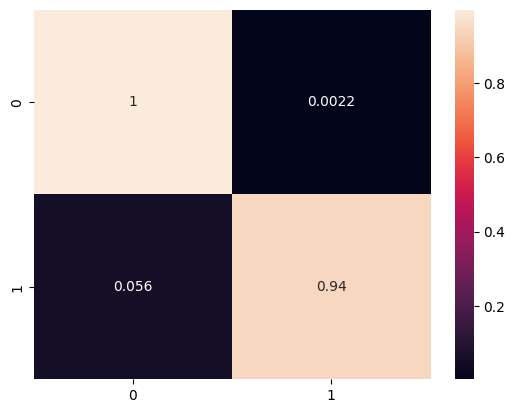

In [32]:
evaluate(m,X_test_PCA, Y_test)

### 2.2. Обучить модель, обеспечивающую вероятность пропуска бота на уровне не выше 0.03, и имеющую насколько возможно низкую вероятность ложного обнаружения.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [34]:
model = LogisticRegression()

f1-score: 1.00


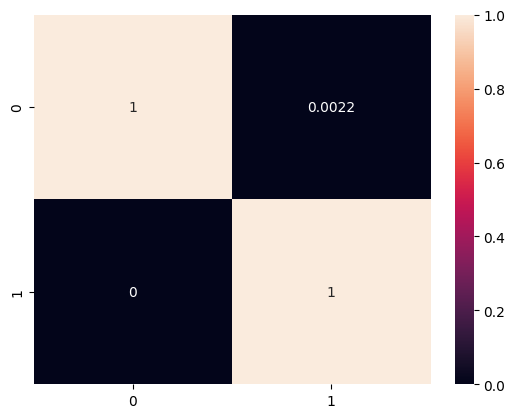

In [35]:
## Логистическая регрессия
X_train_LR = SS.fit_transform(X_train)
X_test_LR = SS.transform(X_test)
model.fit(X_train_LR, Y_train)
Y_LR = model.predict(X_test_LR)
ev = evaluate(model, X_test_LR, Y_test)

In [36]:
print ('Наибольшее значение F-меры: f1-score: 1.00.  Модель: LogisticRegression')
from pickle import dumps
with open('model_3.pkl', 'wb') as f:
    f.write(
        dumps(
            {
                'model': model,
                'norm' : SS
            }
        )
    )

Наибольшее значение F-меры: f1-score: 1.00.  Модель: LogisticRegression


In [37]:
result = classify('model_3.pkl','features_train.csv')
print(result)

[0 0 1 ... 1 1 1]
